KeyboardInterrupt: 

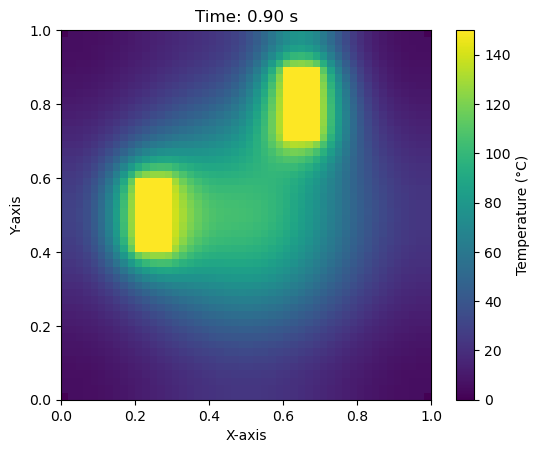

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 500
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.2, 0.3],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.7, 0.9],
    'position_y': [0.6, 0.7],
    'temperature': 150.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=150)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, initial_temperature
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 199
        if 50 <= frame < 200:
            
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Do nothing at frame 200
    if frame == 200:
        pass

    # Apply diffusion after frame 200
    if frame > 200:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)
        
        # Track temperature at the center of heat_source_1
        center_temperature_history.append(updated_temperature[int(0.5 * num_points_x), int(0.25 * num_points_y)])

    # Apply Dirichlet boundary conditions at t=0
    if frame == 0:
        updated_temperature[:, 0] = 0.0  # Left boundary
        updated_temperature[:, -1] = 0.0  # Right boundary
        updated_temperature[0, :] = 0.0  # Top boundary
        updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply Neumann boundary conditions for subsequent time steps
    else:
        updated_temperature[0, 1:-1] = updated_temperature[1, 1:-1]  # Top boundary
        updated_temperature[-1, 1:-1] = updated_temperature[-2, 1:-1]  # Bottom boundary
        updated_temperature[1:-1, 0] = updated_temperature[1:-1, 1]  # Left boundary
        updated_temperature[1:-1, -1] = updated_temperature[1:-1, -2]  # Right boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
        # Temperature should not be higher than the source or heat exchange will not continue

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Update plot data
    plot.set_data(updated_temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames for better visualization

# Display each frame in line
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames


KeyboardInterrupt: 

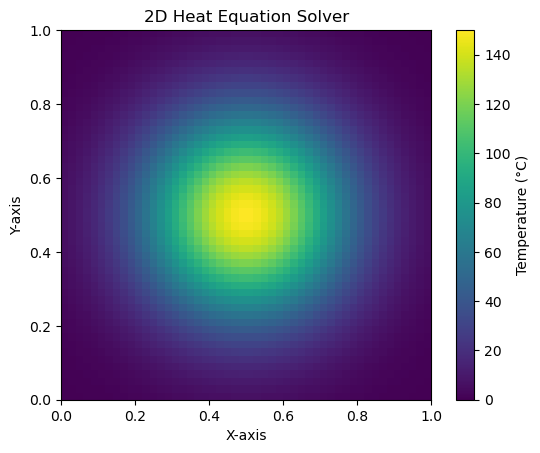

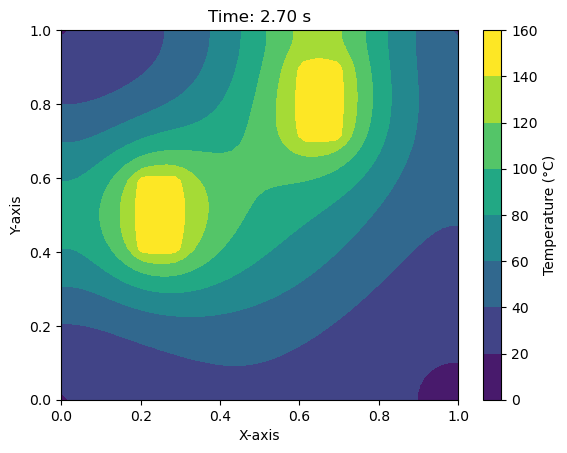

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 500
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.2, 0.3],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.7, 0.9],
    'position_y': [0.6, 0.7],
    'temperature': 150.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=150)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Create plot for contour plot
fig_contour, ax_contour = plt.subplots()
contour_plot = ax_contour.contourf(X, Y, initial_temperature, cmap='viridis', vmin=0, vmax=150)
ax_contour.set_title('2D Heat Equation Solver - Contour Plot')
ax_contour.set_xlabel('X-axis')
ax_contour.set_ylabel('Y-axis')
cbar_contour = plt.colorbar(contour_plot, ax=ax_contour, label='Temperature (°C)')

# Function to update the contour plot for each time step
def update_contour(frame):
    global updated_temperature, initial_temperature

    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 300
        if 50 <= frame < 300:
            
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Do nothing at frame 300
    if frame == 300:
        pass

    # Apply diffusion after frame 300
    if frame > 300:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions at t=0
    if frame == 0:
        updated_temperature[:, 0] = 0.0  # Left boundary
        updated_temperature[:, -1] = 0.0  # Right boundary
        updated_temperature[0, :] = 0.0  # Top boundary
        updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply Neumann boundary conditions for subsequent time steps
    else:
        updated_temperature[0, 1:-1] = updated_temperature[1, 1:-1]  # Top boundary
        updated_temperature[-1, 1:-1] = updated_temperature[-2, 1:-1]  # Bottom boundary
        updated_temperature[1:-1, 0] = updated_temperature[1:-1, 1]  # Left boundary
        updated_temperature[1:-1, -1] = updated_temperature[1:-1, -2]  # Right boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
        # Temperature should not be higher than the source or heat exchange will not continue

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Update contour plot data
    contour_plot = ax_contour.contourf(X, Y, updated_temperature, cmap='viridis', vmin=0, vmax=150)
    ax_contour.set_title(f'Time: {frame * dt:.2f} s')
    display(fig_contour)  # Display the updated contour plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames for better visualization

# Display each frame in line for the contour plot
for frame in range(num_time_steps):
    update_contour(frame)
    time.sleep(0.01)  # Add a small delay between frames

KeyboardInterrupt: 

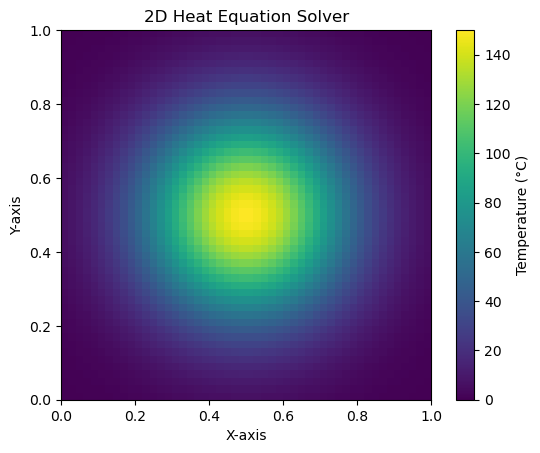

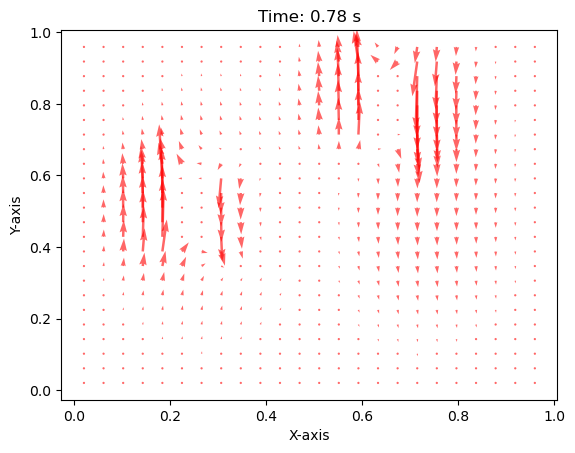

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 500
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.2, 0.3],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.7, 0.9],
    'position_y': [0.6, 0.7],
    'temperature': 150.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=150)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()
# Create plot for arrows
fig, ax_quiver = plt.subplots()

# Initialize updated_temperature and initial_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Set arrow width
arrow_width = 0.005

# Function to calculate the scaling factor based on the desired maximum arrow length
def calculate_scaling_factor(grad_x, grad_y, dx, dy, desired_max_length):
    max_gradient = np.max(np.sqrt(grad_x**2 + grad_y**2))
    scaling_factor = desired_max_length / (max_gradient * np.max([dx, dy]))
    return scaling_factor

# Initialize quiver plot with adjusted parameters
quiver_plot = ax_quiver.quiver(X[1:-1:2, 1:-1:2].flatten(), Y[1:-1:2, 1:-1:2].flatten(),
                               np.zeros_like(X[1:-1:2, 1:-1:2]).flatten(), np.zeros_like(Y[1:-1:2, 1:-1:2]).flatten(),
                               scale_units='xy', angles='xy', color='r', alpha=0.6, width=arrow_width)

ax_quiver.set_title('Temperature Gradient Arrows')
ax_quiver.set_xlabel('X-axis')
ax_quiver.set_ylabel('Y-axis')

# Function to update the contour plot for each time step
def update_contour(frame):
    global updated_temperature, initial_temperature

    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 300
        if 50 <= frame < 300:
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Do nothing at frame 300
    if frame == 300:
        pass

    # Apply diffusion after frame 300
    if frame > 300:
        updated_temperature[:, :] = 20  # Set the entire plate's temperature to 20

    # Apply Dirichlet boundary conditions at t=0
    if frame == 0:
        updated_temperature[:, 0] = 0.0  # Left boundary
        updated_temperature[:, -1] = 0.0  # Right boundary
        updated_temperature[0, :] = 0.0  # Top boundary
        updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply Neumann boundary conditions for subsequent time steps
    else:
        updated_temperature[0, 1:-1] = updated_temperature[1, 1:-1]  # Top boundary
        updated_temperature[-1, 1:-1] = updated_temperature[-2, 1:-1]  # Bottom boundary
        updated_temperature[1:-1, 0] = updated_temperature[1:-1, 1]  # Left boundary
        updated_temperature[1:-1, -1] = updated_temperature[1:-1, -2]  # Right boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
        # Temperature should not be higher than the source or heat exchange will not continue

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Calculate temperature gradient
    grad_x, grad_y = np.gradient(updated_temperature, dx, dy)

    # Calculate the scaling factor
    desired_max_arrow_length = 0.1
    scaling_factor = calculate_scaling_factor(grad_x, grad_y, dx, dy, desired_max_arrow_length) * 5

    # Update quiver plot data
    quiver_plot.set_UVC(grad_x[1:-1:2, 1:-1:2].flatten() * scaling_factor, grad_y[1:-1:2, 1:-1:2].flatten() * scaling_factor**0.5)

    # Update plot title
    ax_quiver.set_title(f'Time: {frame * dt:.2f} s')

    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames

# Display each frame in line
for frame in range(num_time_steps):
    update_contour(frame)
    time.sleep(0.01)  # Add a small delay between frames



Temperature at (0.7, 0.5) at frame 250: 63.61127188265937


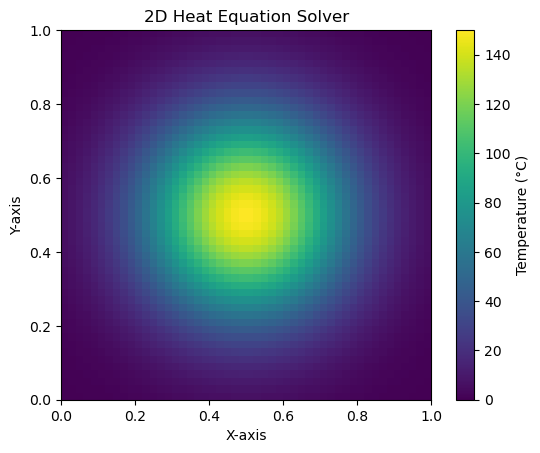

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 50.0    # Total simulation time (seconds)
num_time_steps = 5000
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.2, 0.3],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.7, 0.9],
    'position_y': [0.6, 0.7],
    'temperature': 150.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=150)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, initial_temperature
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 199
        if 50 <= frame < 200:
            
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Do nothing at frame 200
    if frame == 200:
        pass

    # Apply diffusion after frame 200
    if frame > 200:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)
        
        # Track temperature at the center of heat_source_1
        center_temperature_history.append(updated_temperature[int(0.5 * num_points_x), int(0.25 * num_points_y)])

    # Apply Dirichlet boundary conditions at t=0
    if frame == 0:
        updated_temperature[:, 0] = 0.0  # Left boundary
        updated_temperature[:, -1] = 0.0  # Right boundary
        updated_temperature[0, :] = 0.0  # Top boundary
        updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply Neumann boundary conditions for subsequent time steps
    else:
        updated_temperature[0, 1:-1] = updated_temperature[1, 1:-1]  # Top boundary
        updated_temperature[-1, 1:-1] = updated_temperature[-2, 1:-1]  # Bottom boundary
        updated_temperature[1:-1, 0] = updated_temperature[1:-1, 1]  # Left boundary
        updated_temperature[1:-1, -1] = updated_temperature[1:-1, -2]  # Right boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
        # Temperature should not be higher than the source or heat exchange will not continue

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()
# Run the simulation
for frame in range(num_time_steps + 1):
    update(frame)
    # Add code to get temperature at an arbitrary point at frame 250
    if frame ==2000:
        arbitrary_point_temperature = updated_temperature[int(0.09 * num_points_x), int(0.09 * num_points_y)]
        print(f'Temperature at (0.7, 0.5) at frame 250: {arbitrary_point_temperature}')

# Display the final plot
plt.show()




In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 60.0    # Total simulation time (seconds)
num_time_steps = 6000
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.2, 0.3],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.7, 0.9],
    'position_y': [0.6, 0.7],
    'temperature': 150.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Track the standard deviation of temperature for equilibrium check
equilibrium_std_history = []
# Initialize a list to store center temperatures at every 10 frames
center_temperature_at_10_frames = []
# Flag to indicate whether the heat source has been removed
heat_source_removed = False


# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, heat_source_removed, equilibrium_std_history

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 199
        if 50 <= frame < 200 and not heat_source_removed:
           
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Apply diffusion after frame 200
    if frame >= 200:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

        # Track the standard deviation of temperature across all points
        equilibrium_std_history.append(np.std(updated_temperature))

    # Check for equilibrium after frame 200
    if frame > 200:
        # Get the center temperature
        center_temperature = updated_temperature[int(0.5 * num_points_x), int(0.5 * num_points_y)]

        # Set the target temperature and tolerance
        target_temperature = 63.0
        tolerance_percent = 39

        # Define the lower and upper bounds based on the tolerance
        lower_bound = target_temperature - (target_temperature * tolerance_percent / 100)
        upper_bound = target_temperature + (target_temperature * tolerance_percent / 100)

        # Check if the center temperature is within the specified range
        if lower_bound <= center_temperature <= upper_bound:
            return True  # Equilibrium reached

    return False  # Equilibrium not reached yet


# Display each frame in line
frame = 501  # Start from 501
start_time = time.time()  # Record the start time
equilibrium_reached = False  # Initialize equilibrium_reached outside the loop

while frame <= num_time_steps:  # Adjust the loop condition based on your requirement
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames

    # Check for equilibrium after frame 200
    if frame > 200:
        # Get the center temperature
        center_temperature = updated_temperature[int(0.5 * num_points_x), int(0.5 * num_points_y)]

        # Set the target temperature and tolerance
        target_temperature = 63.0
        tolerance_percent = 1

        # Define the lower and upper bounds based on the tolerance
        lower_bound = target_temperature - (target_temperature * tolerance_percent / 100)
        upper_bound = target_temperature + (target_temperature * tolerance_percent / 100)

        # Check if the center temperature is within the specified range
        if lower_bound <= center_temperature <= upper_bound:
            equilibrium_reached = True  # Set the variable to True
            break

    # If equilibrium is not reached, increase frame counter
    frame += 1

    # Display the center temperature at specific frames
    if frame % 10 == 1:  # Check every 10 frames
        center_temperature_at_10_frames.append((frame, updated_temperature[int(0.5 * num_points_x), int(0.5 * num_points_y)]))

    # Update plot data
    plot.set_data(updated_temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)
    clear_output(wait=True)
    time.sleep(0.01)

# Print the number of frames simulated
print(f"Number of frames simulated: {frame}")

# Check if equilibrium is reached by the end of the simulation
if equilibrium_reached:
    print("System reached equilibrium.")
else:
    print("Equilibrium not reached within the given simulation time.")

# Append center temperatures at every 10 frames after the simulation ends
for frame, center_temp in center_temperature_at_10_frames:
    print(f'Temperature at center at frame {frame}: {center_temp}')
    

Number of frames simulated: 634
System reached equilibrium.
Temperature at center at frame 511: 136.01435918119392
Temperature at center at frame 521: 124.68761725147056
Temperature at center at frame 531: 115.10482178398428
Temperature at center at frame 541: 106.89140511916855
Temperature at center at frame 551: 99.7723282776136
Temperature at center at frame 561: 93.54019434869495
Temperature at center at frame 571: 88.03508428733308
Temperature at center at frame 581: 83.13158644241923
Temperature at center at frame 591: 78.73012007045651
Temperature at center at frame 601: 74.7508676923749
Temperature at center at frame 611: 71.1293713156066
Temperature at center at frame 621: 67.81324708144514
Temperature at center at frame 631: 64.75968524887375
